In [381]:
import pandas

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

pandas.options.display.max_colwidth = 500

In [382]:
import glob

data = pandas.concat([pandas.read_csv(f) for f in glob.glob('/Users/Olamilekan/Desktop/Machine Learning/OpenSource/ayo/data/cleaned/*.csv')], ignore_index = True)

In [383]:
data['earned_free_move'].fillna(False, inplace=True)

In [384]:
data.rename(columns={'Unnamed: 0': 'move_number','moves': 'pit_chosen'}, inplace=True)

In [385]:
data['points'].fillna(0, inplace=True)

In [386]:
data['earned_free_move'].fillna(False, inplace=True)

In [387]:
def clean_move_number(n):
    return n + 1

data['move_number'] = data.move_number.apply(clean_move_number)

In [388]:
def clean_earned_free_move(n):
    return 1 if True else 0

data['earned_free_move'] = data.earned_free_move.apply(clean_earned_free_move)

In [389]:
data.set_index(['game_id', 'move_number'], inplace=True)

In [390]:
data.head()

pit_chosen  earned_free_move  won  invalid  points  \
game_id   move_number                                                       
AYO-98e3f 1                     3                 1    0        0     0.0   
          2                     4                 1    0        0    23.0   
          3                     5                 1    0        0     0.0   
          4                     6                 1    0        0     0.0   
          5                     1                 1    0        0     0.0   

                      player  
game_id   move_number         
AYO-98e3f 1            north  
          2            north  
          3            north  
          4            north  
          5            north

In [391]:
data.index.names

FrozenList(['game_id', 'move_number'])

In [392]:
len(data.index.get_level_values(0))

2846

In [393]:
len(data.index.get_level_values(1))

2846

In [394]:
data[data['earned_free_move'] == True].head()

pit_chosen  earned_free_move  won  invalid  points  \
game_id   move_number                                                       
AYO-98e3f 1                     3                 1    0        0     0.0   
          2                     4                 1    0        0    23.0   
          3                     5                 1    0        0     0.0   
          4                     6                 1    0        0     0.0   
          5                     1                 1    0        0     0.0   

                      player  
game_id   move_number         
AYO-98e3f 1            north  
          2            north  
          3            north  
          4            north  
          5            north

In [397]:
data.groupby(['game_id', 'move_number']).max()

pit_chosen  earned_free_move  won  invalid  points  \
game_id   move_number                                                       
AYO-0811f 1                     3                 1    0        0     0.0   
          2                     4                 1    0        0    31.0   
          3                     5                 1    0        0     0.0   
          4                     6                 1    0        0     0.0   
          5                     4                 1    0        0     0.0   
          6                     4                 1    0        0     0.0   
          7                     5                 1    0        0     0.0   
          8                     6                 1    0        0     0.0   
          9                     5                 1    0        0     0.0   
          10                    2                 1    0        0     0.0   
          11                    6                 1    0        0     0.0   
          12                    5                 1    0        0     0.0   
          13                    6                 1    0        0     0.0   
          14                    6                 1    0        0     0.0   
          15                    5                 1    0        0     0.0   
          16                    6                 1    0        0     0.0   
          17                    6                 1    0        0     0.0   
          18                    4                 1    0        0     0.0   
          19                    5                 1    0        0     0.0   
          20                    6                 1    1        0     0.0   
          21                    5                 1    0        0     0.0   
          22                    6                 1    0        0     0.0   
          23                    4                 1    0        0     0.0   
          24                    5                 1    0        0     0.0   
AYO-0ab5b 1                     3                 1    0        0     0.0   
          2                     4                 1    0        0    25.0   
          3                     5                 1    0        0     0.0   
          4                     6                 1    0        0     0.0   
          5                     4                 1    0        0     0.0   
          6                     3                 1    0        0     0.0   
...                           ...               ...  ...      ...     ...   
AYO-fc642 2                     4                 1    0        0    33.0   
          3                     5                 1    0        0     0.0   
          4                     6                 1    0        0     0.0   
          5                     4                 1    0        0     0.0   
          6                     5                 1    0        0     0.0   
          7                     5                 1    0        0     0.0   
          8                     4                 1    0        0     0.0   
          9                     5                 1    0        0     0.0   
          10                    5                 1    0        0     0.0   
          11                    6                 1    0        0     0.0   
          12                    5                 1    0        0     0.0   
          13                    6                 1    0        0     0.0   
          14                    4                 1    0        0     0.0   
          15                    6                 1    0        0     0.0   
          16                    1                 1    1        0     0.0   
AYO-ff948 1                     3                 1    0        0     0.0   
          2                     4                 1    0        0    25.0   
          3                     5                 1    0        0     0.0   
          4                     6                 1    0        0     0.0   
          5        

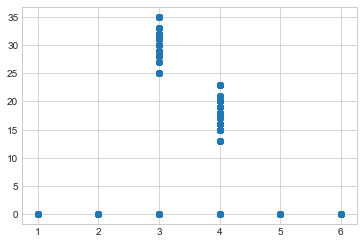

In [396]:
plt.scatter(data['pit_chosen'],data['points'])